In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL with the limit parameter to get data for the year 2022
fgi_url = 'https://api.alternative.me/fng/?limit=365'
response = requests.get(fgi_url)
response_json = response.json()

# Create a list with the data of the index for the year 2022
fg_index_list = response_json['data']

# Preview first 2 elements in list
fg_index_list[:2]

[{'value': '70',
  'value_classification': 'Greed',
  'timestamp': '1699574400',
  'time_until_update': '25673'},
 {'value': '69', 'value_classification': 'Greed', 'timestamp': '1699488000'}]

In [10]:
# Convert the list to a Pandas DataFrame
df = pd.DataFrame(fg_index_list)

df.head()

,value,value_classification,timestamp,time_until_update
0,70,Greed,1699574400,25673
1,69,Greed,1699488000,NaN
2,66,Greed,1699401600,NaN
3,68,Greed,1699315200,NaN
4,74,Greed,1699228800,NaN


In [11]:
# Convert the timestamp to "yyyy-mm-dd" format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')
df.set_index('timestamp', inplace=True)

df.head()

/var/folders/tl/pmdc2_wx3hx1zkjc2fzswyyc0000gn/T/ipykernel_88473/391914258.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')


,value,value_classification,time_until_update
timestamp,,,
2023-11-10,70,Greed,25673
2023-11-09,69,Greed,NaN
2023-11-08,66,Greed,NaN
2023-11-07,68,Greed,NaN
2023-11-06,74,Greed,NaN


In [12]:
# Convert the 'value' column to a numeric data type (float)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Divide the 'value' column by 100
df['value'] = df['value'] / 100


df

,value,value_classification,time_until_update
timestamp,,,
2023-11-10,0.70,Greed,25673
2023-11-09,0.69,Greed,NaN
2023-11-08,0.66,Greed,NaN
2023-11-07,0.68,Greed,NaN
2023-11-06,0.74,Greed,NaN
...,...,...,...
2022-11-15,0.22,Extreme Fear,NaN
2022-11-14,0.24,Extreme Fear,NaN
2022-11-13,0.22,Extreme Fear,NaN


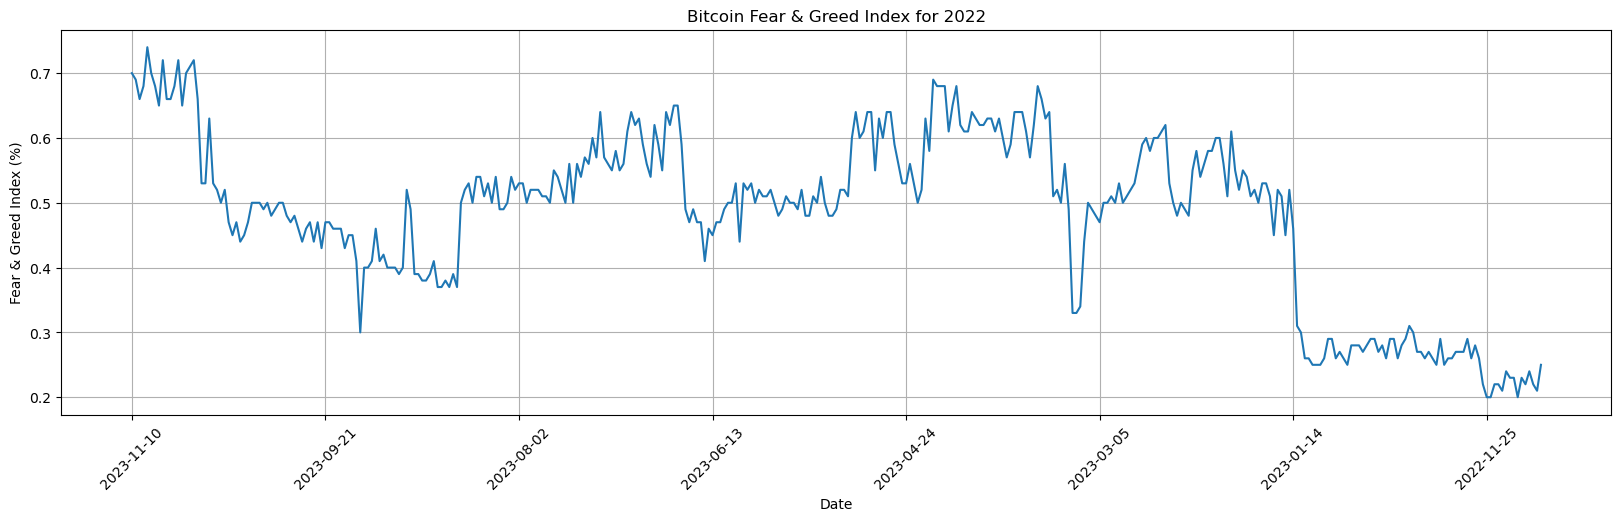

In [15]:
# Plot the data using .plot() method
ax = df['value'].plot(
    figsize=(20, 5),
    xlabel ='Date',
    ylabel = 'Fear & Greed Index (%)',
    title ='Bitcoin Fear & Greed Index for 2022',
    rot= 45,
    grid=True
)


# Show the plot
ax;